<a href="https://colab.research.google.com/github/PedroIsacS/data_science_aulas/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
dt = pd.read_csv("/content/B2W-Reviews01.csv")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


<ipython-input-3-96666cbd4120>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv("/content/B2W-Reviews01.csv")


In [4]:
dt[['product_name','site_category_lv1','site_category_lv2','review_title','overall_rating','recommend_to_a_friend','review_text','reviewer_birth_year','reviewer_gender','reviewer_state']]

,product_name,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,Notebook Asus Vivobook Max X541NA-GO472T Intel...,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,Copo Acrílico Com Canudo 500ml Rocie,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,Panela de Pressão Elétrica Philips Walita Dail...,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,Betoneira Columbus - Roma Brinquedos,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...
132368,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,Mop Giratório Fit + Refil Extra - At Home,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,Etiquetas Jurídicas Vade Mecum - Marca Fácil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [5]:
print('Avaliações nulas:',dt['review_text'].isnull().sum())

Avaliações nulas: 3275


In [7]:
print('Registros duplicados:',dt.duplicated(keep=False).sum())

Registros duplicados: 1907


In [8]:
dt = dt.drop_duplicates().reset_index(drop=True)
print('Formato do dataset após remoção de duplicados:', dt.shape)

Formato do dataset após remoção de duplicados: (131418, 14)


In [11]:
#Remover valores nulos apenas das colunas
dt = dt.dropna(subset=['review_text',
                       'overall_rating',
                       'recommend_to_a_friend'])

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128208 entries, 0 to 131417
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        128208 non-null  object 
 1   reviewer_id            128208 non-null  object 
 2   product_id             128208 non-null  object 
 3   product_name           128148 non-null  object 
 4   product_brand          40040 non-null   object 
 5   site_category_lv1      128202 non-null  object 
 6   site_category_lv2      124361 non-null  object 
 7   review_title           127982 non-null  object 
 8   overall_rating         128208 non-null  int64  
 9   recommend_to_a_friend  128208 non-null  object 
 10  review_text            128208 non-null  object 
 11  reviewer_birth_year    122479 non-null  float64
 12  reviewer_gender        124260 non-null  object 
 13  reviewer_state         124401 non-null  object 
dtypes: float64(1), int64(1), object(12)
memor

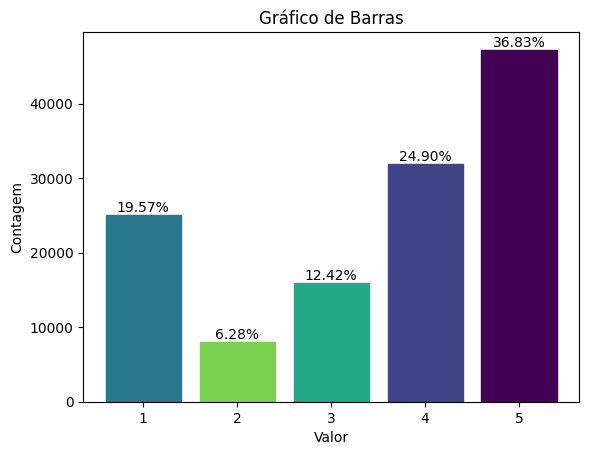

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#Contar ocorrências de cada valor na coluna 'dados'
contagem = dt['overall_rating'].value_counts()

#Calcular o total de observações
total_observacoes = contagem.sum()

#Calcular a porcentagem para cada valor
percentuais = (contagem / total_observacoes) * 100

#Criar o gráfico de barras
bars = plt.bar(contagem.index,
               contagem.values, color='skyblue')

#Adicionar a quantidade em percentuais na barra
for bar, percentual in zip(bars, percentuais):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
           f'{percentual:.2f}%',
           ha='center', va='bottom')

#Adicionar rótulos e título
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras')

#Mudar de cor entre as barras
for i in range(len(bars)):
  bars[i].set_color(plt.cm.viridis(i / len(bars)))

#Mostrar o grafico
plt.show()

In [19]:
dt[['review_text','overall_rating']]

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
131413,"Vale muito, estou usando no controle do Xbox e...",5
131414,"Prático e barato, super indico o produto para ...",5
131415,Chegou antes do prazo previsto e corresponde a...,4
131416,"Material fraco, poderia ser melhor. Ficou deve...",1


In [31]:
dt[dt['overall_rating']==1].to_excel('avaliacao_1.xlsx')

In [21]:
def tratar_sentimento(nota):
  if nota in (3,4,5):
    return 1 #Positivo
  else:
    return 0 #negativo

In [24]:
dt['sentimento'] = dt['overall_rating'].apply(tratar_sentimento)

In [25]:
dt[['overall_rating','sentimento']]

,overall_rating,sentimento
0,4,1
1,4,1
2,4,1
3,4,1
4,5,1
...,...,...
131413,5,1
131414,5,1
131415,4,1
131416,1,0


In [33]:
def tratar_sentimento(row):
  nota = row['overall_rating']
  amigo = row['recommend_to_a_friend']

  if amigo == 'Yes':
    return 1 #positivo
  elif (nota in (4,5)):
    return 1 #positivo
  else:
    return 0 #negativo

In [34]:
dt['sentimento'] = dt.apply(tratar_sentimento, axis=1)